# DM - Analyse de données

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
df = pd.read_csv('annivs.csv')

## Nettoyage du dataframe

In [5]:
df.head()

,web-scraper-order,web-scraper-start-url,persons,persons-href,date2
0,1694977088-1,https://eleves.mines-paris.eu/people/,Zikang\nZHU,https://eleves.mines-paris.eu/people/22zhu,Date de naissance : 1 janvier 2000
1,1694977090-2,https://eleves.mines-paris.eu/people/,Haochen\nZHANG,https://eleves.mines-paris.eu/people/22zhang,Date de naissance : 1 janvier 2000
2,1694977092-3,https://eleves.mines-paris.eu/people/,Ayman\nZEINEH,https://eleves.mines-paris.eu/people/22zeineh,Date de naissance : 1 janvier 2000
3,1694977095-4,https://eleves.mines-paris.eu/people/,François\nYVETOT,https://eleves.mines-paris.eu/people/23yvetot,Date de naissance : 26 février 2003
4,1694977097-5,https://eleves.mines-paris.eu/people/,Yanis\nYARHZOU,https://eleves.mines-paris.eu/people/23yarhzou,Date de naissance : 15 mars 2004


### 1 - Tri et séparation des colonnes

In [17]:
# On supprime les colonnes inutiles 
df = df.drop('web-scraper-order', axis = 1)
df = df.drop('web-scraper-start-url', axis = 1)
df = df.drop('persons-href', axis = 1)

In [18]:
df.head()

,persons,date2
0,Zikang\nZHU,Date de naissance : 1 janvier 2000
1,Haochen\nZHANG,Date de naissance : 1 janvier 2000
2,Ayman\nZEINEH,Date de naissance : 1 janvier 2000
3,François\nYVETOT,Date de naissance : 26 février 2003
4,Yanis\nYARHZOU,Date de naissance : 15 mars 2004


In [216]:
# On crée deux colonnes distinctes pour nom et prénom
df['firstname'] = df['persons'].str.split('\n',n=2, expand=True)[0]

df['lastname'] = df['persons'].str.split('\n',n=2, expand=True)[1]

df['lastname'] = df['lastname'].str.replace(" ","") # On retire l'espace éventuellement laissé avant le surnom

df

,persons,date2,firstname,lastname
0,Zikang\nZHU,1 janvier 2000,Zikang,ZHU
1,Haochen\nZHANG,1 janvier 2000,Haochen,ZHANG
2,Ayman\nZEINEH,1 janvier 2000,Ayman,ZEINEH
3,François\nYVETOT,26 février 2003,François,YVETOT
4,Yanis\nYARHZOU,15 mars 2004,Yanis,YARHZOU
...,...,...,...,...
165,Amine\nAMZAI,None,Amine,AMZAI
166,Valentin\nALLARD \n(Valou),10 octobre 2003,Valentin,ALLARD
167,Sahar\nAISSAOUI,1 janvier 2000,Sahar,AISSAOUI
168,David\nABULIUS \n(Dumbledore ),14 mars 2003,David,ABULIUS


### Format de la date de naissance

In [41]:
df['date2'] = df['date2'].str.replace("Date de naissance : ","")
df

,persons,date2,firstname,lastname
0,Zikang\nZHU,1 janvier 2000,Zikang,ZHU
1,Haochen\nZHANG,1 janvier 2000,Haochen,ZHANG
2,Ayman\nZEINEH,1 janvier 2000,Ayman,ZEINEH
3,François\nYVETOT,26 février 2003,François,YVETOT
4,Yanis\nYARHZOU,15 mars 2004,Yanis,YARHZOU
...,...,...,...,...
165,Amine\nAMZAI,None,Amine,AMZAI
166,Valentin\nALLARD \n(Valou),10 octobre 2003,Valentin,ALLARD
167,Sahar\nAISSAOUI,1 janvier 2000,Sahar,AISSAOUI
168,David\nABULIUS \n(Dumbledore ),14 mars 2003,David,ABULIUS


#### Correction d'erreurs dans la base de données

In [108]:
# Les personnes ayant 1er janvier 2000 comme date de naissance ne sont pas des élèves de P23. 
# On les retire en créant un nouveau dataframe sur lequel on travaillera dorénavant.
df2 = df.query("date2 != '1 janvier 2000'").copy()
df2

,persons,date2,firstname,lastname
3,François\nYVETOT,26 février 2003,François,YVETOT
4,Yanis\nYARHZOU,15 mars 2004,Yanis,YARHZOU
6,Benoit\nVOGEL,22 août 2003,Benoit,VOGEL
7,Gabriel\nVIBERT \n(Gab/Gabi),12 mars 2004,Gabriel,VIBERT
9,Mathis\nVERDAN \n(Le JaaJ),27 janvier 2003,Mathis,VERDAN
...,...,...,...,...
163,Nejma\nARAKI,20 juin 2003,Nejma,ARAKI
164,Gaspard\nARACTINGI,None,Gaspard,ARACTINGI
165,Amine\nAMZAI,None,Amine,AMZAI
166,Valentin\nALLARD \n(Valou),10 octobre 2003,Valentin,ALLARD


In [109]:
# Certaines dates de naissance ont été oubliées : on les localise.
df.loc[df['date2']=="None",]

,persons,date2,firstname,lastname
29,Grégor\nRONCIN,None,Grégor,RONCIN
31,Fatima-Azzahra\nRHARBAL,None,Fatima-Azzahra,RHARBAL
59,Neil\nMIKOU,None,Neil,MIKOU
134,Cyrianne\nCHABERT,None,Cyrianne,CHABERT
140,Salomé\nBRICHET,None,Salomé,BRICHET
143,Charlotte\nBOURNY,None,Charlotte,BOURNY
153,Louis\nBINDEL,None,Louis,BINDEL
164,Gaspard\nARACTINGI,None,Gaspard,ARACTINGI
165,Amine\nAMZAI,None,Amine,AMZAI


In [195]:
# On rentre manuellement les dates manquantes.
df2.loc[df2['lastname']=="RONCIN",['date2']]="6 avril 2003"
df2.loc[df2['lastname']=="RHARBAL",['date2']]="23 mai 2003"
df2.loc[df2['lastname']=="MIKOU",['date2']]="22 janvier 2003"
df2.loc[df2['lastname']=="CHABERT",['date2']]="29 mars 2003"
df2.loc[df2['lastname']=="BRICHET",['date2']]="6 mai 2003"
df2.loc[df2['lastname']=="BOURNY",['date2']]="12 novembre 2003"
df2.loc[df2['lastname']=="BINDEL",['date2']]="28 décembre 2004"
df2.loc[df2['lastname']=="ARACTINGI",['date2']]="2 novembre 2003"
df2.loc[df2['lastname']=="AMZAI",['date2']]="1 octobre 2003"

#### Création de nouvelles colonnes pour gérer les dates de naissance

In [217]:
df2['jour'] = df2['date2'].str.split(' ',n=2, expand=True)[0]

df2['mois'] = df2['date2'].str.split(' ',n=2, expand=True)[1]

df2['annee'] = df2['date2'].str.split(' ',n=2, expand=True)[2]

df2

,persons,date2,firstname,lastname,jour,mois,annee,mois2,anniv,naissance,mois_an,Initiale,InitialeP
3,François\nYVETOT,26 février 2003,François,YVETOT,26,février,2003,02,26-02,2003-02-26,2003-02,Y,F
4,Yanis\nYARHZOU,15 mars 2004,Yanis,YARHZOU,15,mars,2004,03,15-03,2004-03-15,2004-03,Y,Y
6,Benoit\nVOGEL,22 août 2003,Benoit,VOGEL,22,août,2003,08,22-08,2003-08-22,2003-08,V,B
7,Gabriel\nVIBERT \n(Gab/Gabi),12 mars 2004,Gabriel,VIBERT,12,mars,2004,03,12-03,2004-03-12,2004-03,V,G
9,Mathis\nVERDAN \n(Le JaaJ),27 janvier 2003,Mathis,VERDAN,27,janvier,2003,01,27-01,2003-01-27,2003-01,V,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,Nejma\nARAKI,20 juin 2003,Nejma,ARAKI,20,juin,2003,06,20-06,2003-06-20,2003-06,A,N
164,Gaspard\nARACTINGI,2 novembre 2003,Gaspard,ARACTINGI,2,novembre,2003,11,2-11,2003-11-02,2003-11,A,G
165,Amine\nAMZAI,1 octobre 2003,Amine,AMZAI,1,octobre,2003,10,1-10,2003-10-01,2003-10,A,A
166,Valentin\nALLARD \n(Valou),10 octobre 2003,Valentin,ALLARD,10,octobre,2003,10,10-10,2003-10-10,2003-10,A,V


In [250]:
#Conversion des mois en nombre : création d'un dictionnaire de correspondance
Mois_nb = {"janvier":"01", "février":"02", "mars":"03", "avril":"04", "mai":"05", "juin":"06", "juillet":"07", "août":"08", "septembre":"09", "octobre":"10", "novembre":"11", "décembre":"12"}

In [221]:
#Conversion des mois en nombre : ajout de la colonne 'mois2' des numéros de mois au dataframe
moisnb = []
for i in range (0,129) :
    moisnb.append(Mois_nb[df2.iloc[i, 5]])

df2['mois2'] = moisnb

df2

,persons,date2,firstname,lastname,jour,mois,annee,mois2,anniv,naissance,mois_an,Initiale,InitialeP
3,François\nYVETOT,26 février 2003,François,YVETOT,26,février,2003,02,26-02,2003-02-26,2003-02,Y,F
4,Yanis\nYARHZOU,15 mars 2004,Yanis,YARHZOU,15,mars,2004,03,15-03,2004-03-15,2004-03,Y,Y
6,Benoit\nVOGEL,22 août 2003,Benoit,VOGEL,22,août,2003,08,22-08,2003-08-22,2003-08,V,B
7,Gabriel\nVIBERT \n(Gab/Gabi),12 mars 2004,Gabriel,VIBERT,12,mars,2004,03,12-03,2004-03-12,2004-03,V,G
9,Mathis\nVERDAN \n(Le JaaJ),27 janvier 2003,Mathis,VERDAN,27,janvier,2003,01,27-01,2003-01-27,2003-01,V,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,Nejma\nARAKI,20 juin 2003,Nejma,ARAKI,20,juin,2003,06,20-06,2003-06-20,2003-06,A,N
164,Gaspard\nARACTINGI,2 novembre 2003,Gaspard,ARACTINGI,2,novembre,2003,11,2-11,2003-11-02,2003-11,A,G
165,Amine\nAMZAI,1 octobre 2003,Amine,AMZAI,1,octobre,2003,10,1-10,2003-10-01,2003-10,A,A
166,Valentin\nALLARD \n(Valou),10 octobre 2003,Valentin,ALLARD,10,octobre,2003,10,10-10,2003-10-10,2003-10,A,V


In [222]:
#Création de nouvelles colonnes 
df2['anniv'] = df2['jour'] + "-" + df2["mois2"]

df2['mois_an'] = df2['annee'] + "-" + df2['mois2']

df2['naissance'] = df2['annee'] + "-" + df2["mois2"] + "-" + df2['jour']

df2

,persons,date2,firstname,lastname,jour,mois,annee,mois2,anniv,naissance,mois_an,Initiale,InitialeP
3,François\nYVETOT,26 février 2003,François,YVETOT,26,février,2003,02,26-02,2003-02-26,2003-02,Y,F
4,Yanis\nYARHZOU,15 mars 2004,Yanis,YARHZOU,15,mars,2004,03,15-03,2004-03-15,2004-03,Y,Y
6,Benoit\nVOGEL,22 août 2003,Benoit,VOGEL,22,août,2003,08,22-08,2003-08-22,2003-08,V,B
7,Gabriel\nVIBERT \n(Gab/Gabi),12 mars 2004,Gabriel,VIBERT,12,mars,2004,03,12-03,2004-03-12,2004-03,V,G
9,Mathis\nVERDAN \n(Le JaaJ),27 janvier 2003,Mathis,VERDAN,27,janvier,2003,01,27-01,2003-01-27,2003-01,V,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,Nejma\nARAKI,20 juin 2003,Nejma,ARAKI,20,juin,2003,06,20-06,2003-06-20,2003-06,A,N
164,Gaspard\nARACTINGI,2 novembre 2003,Gaspard,ARACTINGI,2,novembre,2003,11,2-11,2003-11-2,2003-11,A,G
165,Amine\nAMZAI,1 octobre 2003,Amine,AMZAI,1,octobre,2003,10,1-10,2003-10-1,2003-10,A,A
166,Valentin\nALLARD \n(Valou),10 octobre 2003,Valentin,ALLARD,10,octobre,2003,10,10-10,2003-10-10,2003-10,A,V


In [115]:
df2.naissance = pd.to_datetime(df2.naissance)

## Analyse sur les dates de naissance

In [161]:
by_month = df2.groupby('mois2')['lastname'].count()
by_month = by_month.reset_index()
by_day = df2.groupby('jour')['lastname'].count()
by_day = by_day.reset_index()

### Répartition par mois de naissance

<BarContainer object of 12 artists>

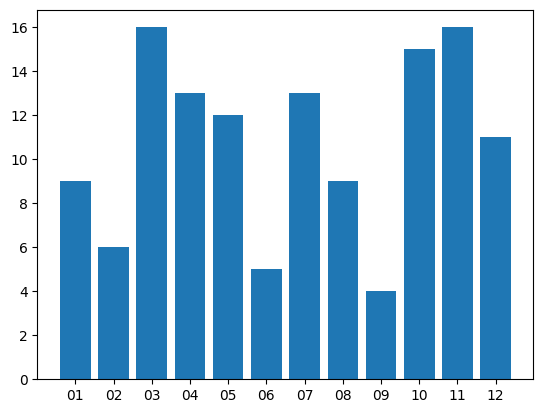

In [163]:
plt.bar(height = by_month['lastname'], x = by_month['mois2'])

### Répartition par numéro du jour de naissance

([<matplotlib.patches.Wedge at 0x149b31850>,
 [Text(1.0970655120517607, 0.08029484582840907, '1'),
  Text(1.0791891981559756, 0.21295697824551954, '10'),
  Text(1.0366818915842637, 0.36781878100672477, '11'),
  Text(0.8706461310509273, 0.672291093564426, '12'),
  Text(0.6616398789625639, 0.8787677000017717, '13'),
  Text(0.43021517325133685, 1.0123808101225162, '14'),
  Text(0.06693054918234825, 1.0979618853066575, '15'),
  Text(-0.12030834796394835, 1.0934010707010422, '16'),
  Text(-0.25222909507934643, 1.0706915912602724, '17'),
  Text(-0.5029665710780818, 0.9782763558309876, '18'),
  Text(-0.782538656315305, 0.7730674300293844, '19'),
  Text(-0.9458603003689335, 0.5615588056348071, '2'),
  Text(-1.017544232920382, 0.41785611644496873, '20'),
  Text(-1.0675409769180717, 0.2652475496603304, '21'),
  Text(-1.0947849348172025, -0.10698573034425532, '22'),
  Text(-0.9592543310820435, -0.5383596644440791, '23'),
  Text(-0.8368813318534492, -0.7138834893700773, '24'),
  Text(-0.7240207263

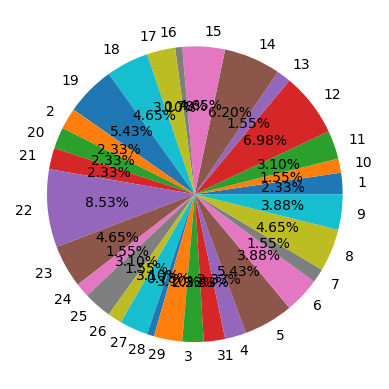

In [168]:
plt.pie(x = by_day['lastname'], labels = by_day['jour'], autopct = '%.2f%%')

### Répartition par année de naissance

In [157]:
by_year = df2.groupby('annee')['lastname'].count()
by_year = by_year.reset_index()

([<matplotlib.patches.Wedge at 0x14a68d090>,
 [Text(1.0996738168320834, 0.02678612652022214, '2001'),
  Text(1.0366818915842637, 0.36781878100672477, '2002'),
  Text(-0.9843281864710073, 0.4910173330124897, '2003'),
  Text(0.7240208232253634, -0.8281267098313321, '2004'),
  Text(1.0947849473381037, -0.10698560221780139, '2005'),
  Text(1.0996738193399769, -0.026786023561328882, '2006')],
 [Text(0.5998220819084091, 0.01461061446557571, '0.78%'),
  Text(0.5654628499550529, 0.20062842600366804, '9.30%'),
  Text(-0.5369062835296403, 0.2678276361886307, '65.12%'),
  Text(0.39492044903201634, -0.4517054780898174, '22.48%'),
  Text(0.5971554258207837, -0.058355783027891656, '1.55%'),
  Text(0.599822083276351, -0.014610558306179387, '0.78%')])

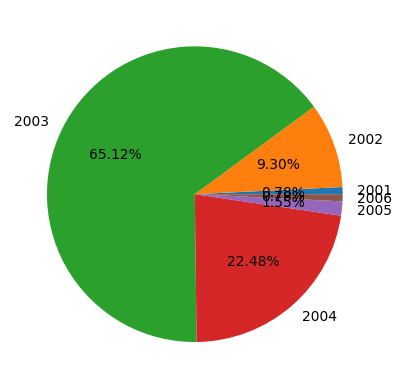

In [158]:
plt.pie(x = by_year['lastname'], labels = by_year['annee'], autopct = '%.2f%%')

### Positions en coordonées jour-mois

In [185]:
df2['jour'] = df2['jour'].astype(int)

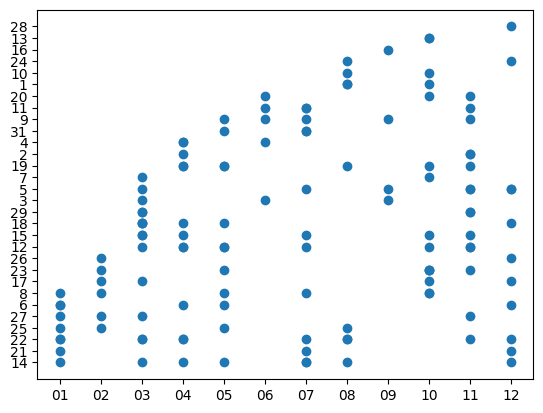

In [230]:
df_tri = df2.sort_values(by = ['mois2', 'jour'], ascending = True)
plt.scatter(df_tri['mois2'], df_tri['jour'])

### Cas extrêmes

In [189]:
df2.loc[df2['jour'] == '30',] # On remarque que personne sur la promo n'est né un 30.

,persons,date2,firstname,lastname,jour,mois,annee,mois2,anniv,naissance


In [188]:
by_birthday = df2.groupby('anniv')['lastname'].count()
by_birthday = by_birthday.reset_index()

In [194]:
by_birthday.loc[by_birthday['lastname'] == 3,] #Ce sont les deux dates avec le plus d'anniversaires.

,anniv,lastname
31,18-03,3
57,23-10,3


### Nombre d'anniversaires par mois

Text(0, 0.5, 'effectif')

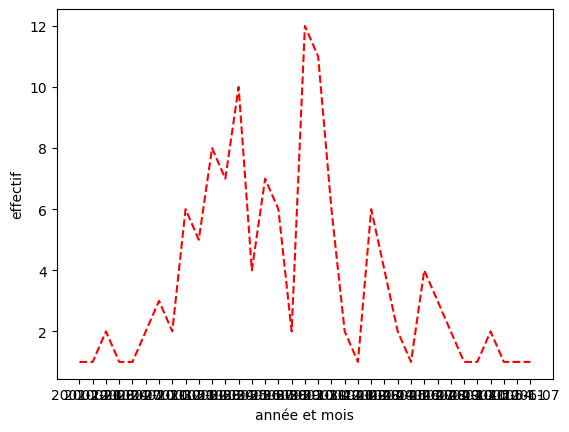

In [249]:
by_ma = df2.groupby('mois_an')['lastname'].count()
by_ma = by_ma.reset_index()
by_ma
plt.plot(by_ma['mois_an'], by_ma['lastname'], linestyle='--', color='red')
plt.xlabel('année et mois')
plt.ylabel('effectif')

## Analyse sur les initiales

In [215]:
df2['Initiale'] = df2['lastname'].str[0]
df2['InitialeP'] = df2['firstname'].str[0]
df2

,persons,date2,firstname,lastname,jour,mois,annee,mois2,anniv,naissance,mois_an,Initiale,InitialeP
3,François\nYVETOT,26 février 2003,François,YVETOT,26,février,2003,02,26-02,2003-02-26,2003-02,Y,F
4,Yanis\nYARHZOU,15 mars 2004,Yanis,YARHZOU,15,mars,2004,03,15-03,2004-03-15,2004-03,Y,Y
6,Benoit\nVOGEL,22 août 2003,Benoit,VOGEL,22,août,2003,08,22-08,2003-08-22,2003-08,V,B
7,Gabriel\nVIBERT \n(Gab/Gabi),12 mars 2004,Gabriel,VIBERT,12,mars,2004,03,12-03,2004-03-12,2004-03,V,G
9,Mathis\nVERDAN \n(Le JaaJ),27 janvier 2003,Mathis,VERDAN,27,janvier,2003,01,27-01,2003-01-27,2003-01,V,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,Nejma\nARAKI,20 juin 2003,Nejma,ARAKI,20,juin,2003,06,20-06,2003-06-20,2003-06,A,N
164,Gaspard\nARACTINGI,2 novembre 2003,Gaspard,ARACTINGI,2,novembre,2003,11,2-11,2003-11-02,2003-11,A,G
165,Amine\nAMZAI,1 octobre 2003,Amine,AMZAI,1,octobre,2003,10,1-10,2003-10-01,2003-10,A,A
166,Valentin\nALLARD \n(Valou),10 octobre 2003,Valentin,ALLARD,10,octobre,2003,10,10-10,2003-10-10,2003-10,A,V


### Initiale du nom de famille

In [231]:
df_initiale = pd.DataFrame() 
df_initiale['Initiale']= df2['Initiale'].unique()
df_initiale['Volume'] = [df2.loc[df2['Initiale'] == L]['lastname'].count() for L in df_initiales['Initiale']]

<BarContainer object of 21 artists>

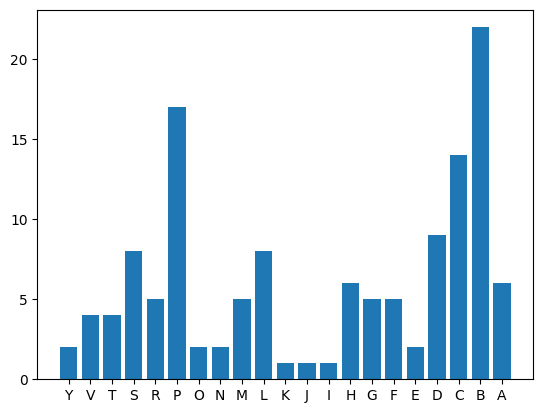

In [224]:
plt.bar(height = df_initiales['Volume'], x = df_initiales['Initiale'])

### Initiale du prénom

In [244]:
df_initialeP = pd.DataFrame()
df_initialeP['InitialeP']= df2['InitialeP'].unique()
df_initialeP['VolumeP'] = [df2.loc[df2['InitialeP'] == F]['firstname'].count() for F in df_initialeP['InitialeP']]

In [245]:
df_initiales

,Initiale,Volume
0,Y,2
1,V,4
2,T,4
3,S,8
4,R,5
5,P,17
6,O,2
7,N,2
8,M,5
9,L,8


<BarContainer object of 22 artists>

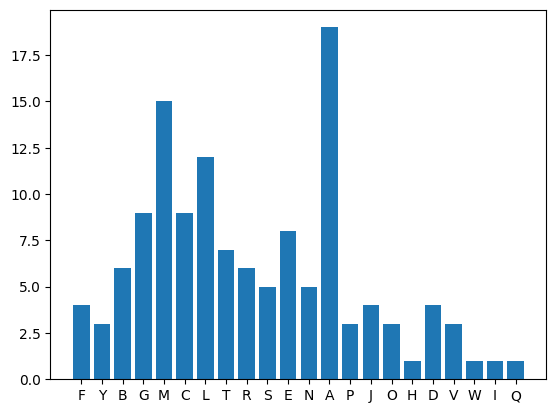

In [247]:
plt.bar(height = df_initialeP['VolumeP'], x = df_initialeP['InitialeP'])

## Conclusion

#### Cette analyse de données permet de retrouver des résultats attendus (comme une majorité de 2003) mais aussi de découvrir des faits plus étonnants (aucune personne née un 30, mois de mars comme mois d'anniversaire le plus représenté).